# Pandas 6

Pandas handles timestamps in a special way that makes it easy to work with time series. As this is particularly important for financial applications, this lecture will concentrate on time series processing.

We will look at:

* the datetime object,
* indexing and slicing by time,
* various operations on time series,
* and, time permitting, we'll build a trading simulator.

In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# For time series analysis, we also need another module
from datetime import datetime

## Loading financial time series data

In [3]:
# Data downloaded from Yahoo! Finance
df = pd.read_csv('Pandas_6_data/aapl.csv') 

# Convert the 'Date' column into a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)
df[:5]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,325.64,330.26,324.84,329.57,111284600,44.59
2011-01-04,332.44,332.50,328.15,331.29,77270200,44.82
2011-01-05,329.55,334.34,329.50,334.00,63879900,45.18
2011-01-06,334.72,335.25,332.90,333.73,75107200,45.15
2011-01-07,333.99,336.35,331.90,336.12,77982800,45.47


Pandas also provides convenience functions to get data directly from web sources. For this, we need the _pandas-datareader_ module.

We need to install pandas-datareader.

* Typically, just installing it from the GUI works, but there's currently a bug whose fix is in the "dev" version, but not in the version installed by default.

* Install git  (this is a commonly used version control software). Then try
> pip install git+https://github.com/pydata/pandas-datareader.git

OR, try this:
> git clone https://github.com/pydata/pandas-datareader.git

> cd pandas-datareader

> python setup.py install

In [4]:
# Import the module for web downloads
# (You will need to install the package "pandas-datareader")
import pandas_datareader.data as web

# Specify start and end dates to download
start_date = datetime(2011, 1, 1) # January 1, 2011
end_date = datetime(2014, 1, 1)   # January 1, 2014

# Get Apple stock from Morningstar for these dates
df = web.DataReader('AAPL', 'morningstar', start_date, end_date).loc['AAPL']
df[:5]

,Close,High,Low,Open,Volume
Date,,,,,
2011-01-03,47.0814,47.1800,46.4052,46.5571,111280407
2011-01-04,47.3271,47.5000,46.8786,47.5000,77337001
2011-01-05,47.7143,47.7629,47.0714,47.0786,63879193
2011-01-06,47.6757,47.8929,47.5571,47.8571,75106626
2011-01-07,48.0171,48.0500,47.4143,47.7314,77982212


Note that this DataFrame has a special kind of index.

In [5]:
df.index

DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-13', '2011-01-14',
               ...
               '2013-12-19', '2013-12-20', '2013-12-23', '2013-12-24',
               '2013-12-25', '2013-12-26', '2013-12-27', '2013-12-30',
               '2013-12-31', '2014-01-01'],
              dtype='datetime64[ns]', name=u'Date', length=783, freq=None)

In [6]:
sixth_date = df.index[5]
sixth_date

Timestamp('2011-01-10 00:00:00')

In [7]:
# We can extract year, month, etc.
print sixth_date, 'corresponds to'
print 'year', sixth_date.year
print 'month', sixth_date.month
print 'day', sixth_date.day
print 'day of the week', sixth_date.dayofweek  # Monday=0, ..., Sunday=6
print 'quarter', sixth_date.quarter

2011-01-10 00:00:00 corresponds to
year 2011
month 1
day 10
day of the week 0
quarter 1


## Indexing in TimeSeries

We can index into this DataFrame using such Timestamp objects.

In [8]:
df.loc[sixth_date]

Close     4.892210e+01
High      4.903290e+01
Low       4.816710e+01
Open      4.840430e+01
Volume    1.121395e+08
Name: 2011-01-10 00:00:00, dtype: float64

In [9]:
df.loc['1/7/2011']

Close     4.801710e+01
High      4.805000e+01
Low       4.741430e+01
Open      4.773140e+01
Volume    7.798221e+07
Name: 2011-01-07 00:00:00, dtype: float64

In [10]:
df.loc['2011-01-05']

Close     4.771430e+01
High      4.776290e+01
Low       4.707140e+01
Open      4.707860e+01
Volume    6.387919e+07
Name: 2011-01-05 00:00:00, dtype: float64

In [11]:
df.loc[datetime(year=2011, month=1, day=5)]

Close     4.771430e+01
High      4.776290e+01
Low       4.707140e+01
Open      4.707860e+01
Volume    6.387919e+07
Name: 2011-01-05 00:00:00, dtype: float64

## Slicing in Time Series

We can also use any of the indexing methods above to select out slices of a time series.

In [12]:
df.loc['1/1/2013':'1/10/2013']

,Close,High,Low,Open,Volume
Date,,,,,
2013-01-01,76.0247,76.0247,76.0247,76.0247,0
2013-01-02,78.4329,79.2857,77.3757,79.1429,140124866
2013-01-03,77.4423,78.5243,77.2857,78.2786,88240950
2013-01-04,75.2857,76.9471,75.1184,76.7357,148581860
2013-01-07,74.8429,75.6143,73.6000,74.5786,121038176
2013-01-08,75.0443,75.9843,74.4643,75.5529,114676751
2013-01-09,73.8714,75.0008,73.7129,74.6729,101899959
2013-01-10,74.7871,75.5314,73.6457,75.5000,150285296


In addition, Pandas allows us to easily slice by month or year as well.

In [13]:
closings = df['Close']  # Select one column from our DataFrame; this is a Series
closings['2013-05']

Date
2013-05-01    62.7557
2013-05-02    63.6457
2013-05-03    64.2829
2013-05-06    65.8157
2013-05-07    65.5226
2013-05-08    66.2629
2013-05-09    65.2529
2013-05-10    64.7100
2013-05-13    64.9629
2013-05-14    63.4086
2013-05-15    61.2643
2013-05-16    62.0826
2013-05-17    61.8943
2013-05-20    63.2757
2013-05-21    62.8086
2013-05-22    63.0506
2013-05-23    63.1629
2013-05-24    63.5929
2013-05-27    63.5929
2013-05-28    63.0627
2013-05-29    63.5643
2013-05-30    64.5114
2013-05-31    64.2479
Name: Close, dtype: float64

In [14]:
closings['2012']

Date
2012-01-02    57.8571
2012-01-03    58.7471
2012-01-04    59.0629
2012-01-05    59.7186
2012-01-06    60.3429
2012-01-09    60.2471
2012-01-10    60.4629
2012-01-11    60.3643
2012-01-12    60.1986
2012-01-13    59.9729
2012-01-16    59.9729
2012-01-17    60.6714
2012-01-18    61.3014
2012-01-19    61.1071
2012-01-20    60.0429
2012-01-23    61.0584
2012-01-24    60.0586
2012-01-25    63.8086
2012-01-26    63.5186
2012-01-27    63.8971
2012-01-30    64.7157
2012-01-31    65.2114
2012-02-01    65.1700
2012-02-02    65.0171
2012-02-03    65.6686
2012-02-06    66.2814
2012-02-07    66.9757
2012-02-08    68.0971
2012-02-09    70.4529
2012-02-10    70.4886
               ...   
2012-11-20    80.1305
2012-11-21    80.2429
2012-11-22    80.2429
2012-11-23    81.6429
2012-11-26    84.2186
2012-11-27    83.5400
2012-11-28    83.2771
2012-11-29    84.1943
2012-11-30    83.6114
2012-12-03    83.7414
2012-12-04    82.2636
2012-12-05    76.9703
2012-12-06    78.1778
2012-12-07    76.1786
2012-

The general solution to slicing is to create a range of dates and select a slice using that range. There are many options:

* For calendar dates, use _date\_range()_, with a common case being:

   > date_range(start_date, end_date, freq)


* The "freq" can be:
    * 'D' for daily
    * 'B' for each business day
    * 'W-MON', 'W-TUE', ... for once a week on Monday, Tuesday, ...
    * 'M' for monthly
    * ...
    * 'WOM-3FRI' for third Friday of the month (usual for option expiry dates)

In [15]:
dates = pd.date_range(start='1/3/2013', end='2/3/2013', freq='W-TUE')
list(dates)

[Timestamp('2013-01-08 00:00:00', freq='W-TUE'),
 Timestamp('2013-01-15 00:00:00', freq='W-TUE'),
 Timestamp('2013-01-22 00:00:00', freq='W-TUE'),
 Timestamp('2013-01-29 00:00:00', freq='W-TUE')]

In [16]:
df.loc[dates]

,Close,High,Low,Open,Volume
2013-01-08,75.0443,75.9843,74.4643,75.5529,114676751
2013-01-15,69.4171,71.2843,69.0543,71.1486,219192932
2013-01-22,72.1100,72.5543,70.9471,72.0786,115386173
2013-01-29,65.4671,65.7429,64.5886,65.4814,142768017


## Shifting time series

One special operation with time series is to move backward or forward in time. For instance:

### What is the percentage daily change in closing price?

In [17]:
closes = df['Close']
closes[:10]

Date
2011-01-03    47.0814
2011-01-04    47.3271
2011-01-05    47.7143
2011-01-06    47.6757
2011-01-07    48.0171
2011-01-10    48.9221
2011-01-11    48.8057
2011-01-12    49.2029
2011-01-13    49.3829
2011-01-14    49.7829
Name: Close, dtype: float64

In [18]:
yesterdays_closes = closes.shift(1)
yesterdays_closes[:5]

Date
2011-01-03        NaN
2011-01-04    47.0814
2011-01-05    47.3271
2011-01-06    47.7143
2011-01-07    47.6757
Name: Close, dtype: float64

In [19]:
df['percent change'] = (closes / yesterdays_closes - 1) * 100
df['percent change'][:5]

Date
2011-01-03         NaN
2011-01-04    0.521862
2011-01-05    0.818136
2011-01-06   -0.080898
2011-01-07    0.716088
Name: percent change, dtype: float64

## Aggregate total trading volume by month

This is accomplished using the _resample()_ method. For example:

In [20]:
df['Volume'].resample('M', kind='period').sum()[:10]

Date
2011-01    2710648612
2011-02    2323973658
2011-03    2825236862
2011-04    2313630256
2011-05    1728012110
2011-06    2316622364
2011-07    2663639874
2011-08    4034292871
2011-09    2994842431
2011-10    3285606996
Freq: M, Name: Volume, dtype: int64

Let us understand the details of this function.

    df['Volume'].resample('M', kind='period').sum()

* This takes the Volume series, which is indexed on a daily basis,
* _"resamples"_ it on a monthly basis (the 'M'),
*  using the corresponding period as the index, e.g., the month '2011-01',
* and aggregates the volumes on all days in the month using the 'sum' function.

### Find the average closing price every week

In [21]:
df['Close'].resample('W', kind='period').mean()[:10]

Date
2011-01-03/2011-01-09    47.56312
2011-01-10/2011-01-16    49.21930
2011-01-17/2011-01-23    48.21058
2011-01-24/2011-01-30    48.62884
2011-01-31/2011-02-06    49.10316
2011-02-07/2011-02-13    50.76088
2011-02-14/2011-02-20    51.17342
2011-02-21/2011-02-27    49.22372
2011-02-28/2011-03-06    50.69144
2011-03-07/2011-03-13    50.35002
Freq: W-SUN, Name: Close, dtype: float64

## Moving averages

A common statistical technique is to smooth a time series by averaging over a time window. For example, a weekly moving average of a time series has, for each day, the average value of the time series over the previous week.

### Get the 30-day moving average

In [22]:
moving_avg_30 = df['Close'].rolling(window=30, min_periods=10).mean()
moving_avg_30[5:12]

Date
2011-01-10          NaN
2011-01-11          NaN
2011-01-12          NaN
2011-01-13          NaN
2011-01-14    48.391210
2011-01-17    48.517727
2011-01-18    48.529942
Name: Close, dtype: float64

What does this mean?

    df['Close'].rolling(window=30, min_periods=10).mean()

* **df['Close']**: use this time series

* **window=30**: take a window of closes over the past 30 days

* **min_periods=10**: If the past 30 days don't exist (say, today is the 25th day from the start of the time series), what do we do? This option says:
    * for the first 10 days of the time series, the moving average doesn't exist (NaN)
    * from the 10th to 30th day, take the average of as many days as are available (so for the 25th day, we average the past 25 days)
    * from the 30th day onwards, take the average of the past 30 days

* **mean()**: Compute the mean for this rolling window

### Plot the daily closes and the 30-day moving average

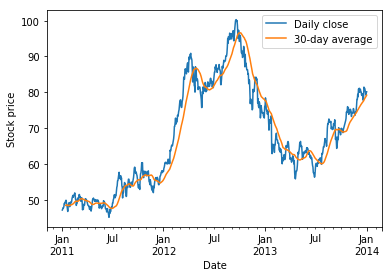

In [23]:
df['Close'].plot(label='Daily close')
df['Close'].rolling(window=30, min_periods=10).mean().plot(label='30-day average')
ylabel('Stock price')
legend(loc='best')
show()

Notice how the x-axis labels automatically say the name of the month, not the ugly "2011-05-01" stuff.

## Trading simulator

A common trading rule says: buy when the 30-day moving average goes above the 180-day moving average (the BUY rule), and sell when it goes below (the SELL rule).

Let us assume you buy 1 share at the closing price the very day the BUY rule triggers, and sell that 1 share the day the SELL rule triggers. (This is cheating a little because we need that day's closing price to compute the averages, but let's gloss over that.) At the end, we want the overall return.

How do we do this?

* Step 1: Compute the daily return ratio, i.e., the ratio of today's closing price to yesterday's closing price.
* Step 2: Create a mask of the days when I hold the share, i.e., the BUY rule has triggered, but the SELL rule has not.
* Step 3: Compute the cumulative return ratio over the days of the mask. This is the product of the return ratios on the days I hold the share.



**Step 1: Daily returns**

We've already seen this.

In [24]:
closes = df['Close']
daily_return_ratio = closes / closes.shift(1)
daily_return_ratio[:10]

Date
2011-01-03         NaN
2011-01-04    1.005219
2011-01-05    1.008181
2011-01-06    0.999191
2011-01-07    1.007161
2011-01-10    1.018847
2011-01-11    0.997621
2011-01-12    1.008138
2011-01-13    1.003658
2011-01-14    1.008100
Name: Close, dtype: float64

**Step 2: Mask of days when we hold share**

How do we do this?

* Compute the 30-day and 180-day moving averages

* Find the days when the 30-day average is greater than the 180-day average.

* On which days do I hold the share?

 Consider the following example:

* The 30-day average is greater than the 180-day average on 5th Jan, 6th Jan, ..., 11th Jan. It falls below the 180-day average on 12th Jan.

* So we buy the share at close of 5th Jan, sell at the close of 12th Jan.

* Hence we _held_ the share (and got its returns) for 6th Jan, 7th Jan, ..., 12th Jan.

* On which days do I hold the share?
    * The days we hold the share is shifted one day from the period the 30-day moving average is higher.

**Step 2: Mask of days when we hold share**

1. Compute the 30-day and 180-day moving averages
2. Find the days when the 30-day average is greater than the 180-day average.
3. The days we hold the share is shifted one day from the periods found in Step 2.

**Step 2.1:** Moving averages

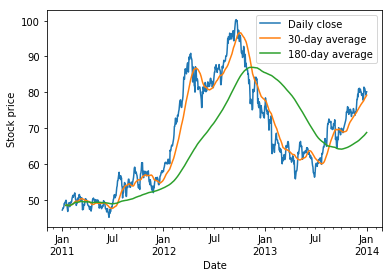

In [25]:
mavg_30 = closes.rolling(window=30, min_periods=10).mean()
mavg_180 = closes.rolling(window=180, min_periods=10).mean()

closes.plot(label='Daily close')
mavg_30.plot(label='30-day average')
mavg_180.plot(label='180-day average')
ylabel('Stock price')
legend(loc='best')
figsize(8,6)

**Step 2.2:** Find the days the 30-day average is greater.

In [26]:
mavg_30_is_greater = (mavg_30 > mavg_180)
mavg_30_is_greater['2011-02-08':'2011-02-22']

Date
2011-02-08    False
2011-02-09    False
2011-02-10    False
2011-02-11    False
2011-02-14     True
2011-02-15     True
2011-02-16     True
2011-02-17     True
2011-02-18     True
2011-02-21     True
2011-02-22     True
Name: Close, dtype: bool

**Step 2.3:** Hold on the days the 30-day moving average is greater, but shifted by 1.

In [27]:
hold_days = mavg_30_is_greater.shift(1)
hold_days['2011-02-08':'2011-02-22']

Date
2011-02-08    False
2011-02-09    False
2011-02-10    False
2011-02-11    False
2011-02-14    False
2011-02-15     True
2011-02-16     True
2011-02-17     True
2011-02-18     True
2011-02-21     True
2011-02-22     True
Name: Close, dtype: object

The story so far:

* We computed daily returns
* We computed the days on which we hold the share

What's left?

* Compute daily returns just on the days we hold the share
    * and take the product of these daily returns

In [28]:
# One little problem
hold_days[0:3]

Date
2011-01-03      NaN
2011-01-04    False
2011-01-05    False
Name: Close, dtype: object

The first date is NaN, because of the shift(). We cannot use hold_days as a mask for daily_return_ratio because the mask must contain only False or True. So let's fix it.

In [29]:
hold_days = hold_days.fillna(False)  # we don't hold shares on the first day
hold_days[0:3]

Date
2011-01-03    False
2011-01-04    False
2011-01-05    False
Name: Close, dtype: bool

Let's see the period when we hold the share

[]

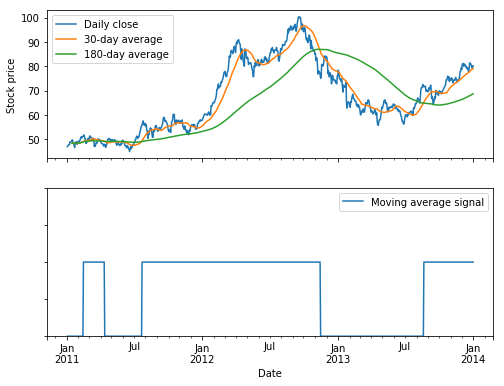

In [30]:
fig, (ax1, ax2) = subplots(nrows=2,
                           ncols=1,
                           sharex=True,
                           figsize=(8, 6))

closes.plot(ax=ax1, label='Daily close')
mavg_30.plot(ax=ax1, label='30-day average')
mavg_180.plot(ax=ax1, label='180-day average')
ax1.legend(loc='best')
ax1.set_ylabel('Stock price')

hold_days.astype(int).plot(ax=ax2, ylim=[0,2], label='Moving average signal')
ax2.legend(loc='best')
ax2.yaxis.set_ticklabels([])

**Finally: Compute cumulative return**

In [31]:
# What are the returns on the days we hold the share?
s = daily_return_ratio[hold_days]
s[:5]

Date
2011-02-15    1.002005
2011-02-16    1.008974
2011-02-17    0.986699
2011-02-18    0.978398
2011-02-21    1.000000
Name: Close, dtype: float64

In [32]:
# Overall return is the product of the returns on each day we held a share.
print 'Overall return ratio =', s.prod()

Overall return ratio = 1.4363823320999483


Is this good? Let's compare to a buy-and-hold strategy, where we buy on the first day and sell on the last.

In [33]:
print 'Return of buy-and-hold =', daily_return_ratio.prod()

Return of buy-and-hold = 1.7022794564307748


Let's see how the cumulative return of the moving average strategy compares to buy-and-hold.

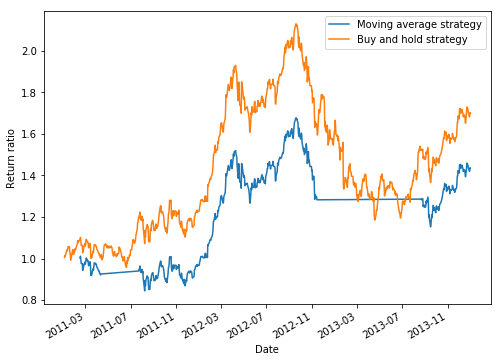

In [34]:
s.cumprod().plot(label='Moving average strategy')
daily_return_ratio.cumprod().plot(label='Buy and hold strategy')
ylabel('Return ratio')
legend(loc='best')
figsize(12,8)

* By the time the moving average strategy sells, the downturn has already hit hard.
* By the time it buys, prices have already gone up quite a bit.